- **Importation des librairies nécessaires au travail**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from skimpy import skim
import matplotlib.pyplot as plt
%matplotlib inline

# Le nécessaire pour plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
py.init_notebook_mode(connected=True)

- **Charger les données dans le notebook**

In [2]:
# Pour afficher toutes les colonnes de la table
pd.set_option("display.max_columns", None)

In [3]:
# Lire les données
attrition_df = pd.read_csv("../data/HR-Employee-Attrition.csv")

In [4]:
# Afficher la taille de la table
print(f"La base fait {attrition_df.shape[0]} linges",
      f"et {attrition_df.shape[1]} colonnes\n")

# Afficher les 5 premières lignes de nos données
attrition_df.head()

La base fait 1470 linges et 35 colonnes



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Savoir les informations sur les données
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Répation de la target
attrition_df["Attrition"].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

- **Vérification de valeurs manquantes**

In [7]:
# Afficher le nombre de valeurs manquantes
print(f"Nous avons au total :", sum(attrition_df.isna().sum()),
      f"valeurs manquantes")

Nous avons au total : 0 valeurs manquantes


- **Affichage des valeurs en double**

In [8]:
# Afficher le nombre de doublons
print(f"Nous avons :", attrition_df.duplicated().sum(),
      f"valeurs en doubles")

Nous avons : 0 valeurs en doubles


- **Identification des valeurs aberrantes (outliers) potentielles**

In [9]:
# Identifier les outliers potentiels

# Définir la fontion pour détecter les outliers dans un DataFrame
def detect_possible_outliers(df, feature):
    """
    Permet de détecter les outliers dans une colonne numérique d'un DataFrame 
    en utilisant la méthode de l'écart interquartile (IQR).
    
    Inputs :
    --------
    - df : DataFrame
    - feature : Nom de la colonne numérique (str)
    
    Outputs :
    ---------
    Renvoyer la liste des index des possibles outliers 
    ainsi que les limites basse et haute
    
    """

    # Calcul du 1er Quartile
    Q1 = np.nanpercentile(df[feature], 25)

    # Calcul du 3ème Quartile
    Q3 = np.nanpercentile(df[feature], 75)

    # Calcul de l'Inter-Quartile Range (IQR)
    IQR = Q3 - Q1

    # Calcul des limites, basse & haute
    outer_fence = IQR * 1.5
    lower_limit = Q1 - outer_fence
    upper_limit = Q3 + outer_fence

    # Détecter des outliers potentiels
    mask = (df[feature] < lower_limit) | (df[feature] > upper_limit)

    # Stocker leurs indices
    possible_outlier_index = df[mask].index

    # Faire passer sous forme de liste
    outliers_index = possible_outlier_index.tolist()

    return sorted(outliers_index), lower_limit, upper_limit


In [10]:
# Appeler la fonction pour détecter les outliers

# Crér la liste des colonnes numériques
num_cols = attrition_df.select_dtypes(include=np.number).columns.tolist()

# Boucler sur toutes les colonnes numériques
for col in num_cols:

    # Procéder à la détection des outliers potentiels
    outliers_index, lower_limit, upper_limit = detect_possible_outliers(attrition_df,
                                                                        col)
    # Afficher le nombre des outliers potentiels de chaque colonne
    print(f"{col :-<30} {len(outliers_index)} valeurs aberrantes potentielles")

Age--------------------------- 0 valeurs aberrantes potentielles
DailyRate--------------------- 0 valeurs aberrantes potentielles
DistanceFromHome-------------- 0 valeurs aberrantes potentielles
Education--------------------- 0 valeurs aberrantes potentielles
EmployeeCount----------------- 0 valeurs aberrantes potentielles
EmployeeNumber---------------- 0 valeurs aberrantes potentielles
EnvironmentSatisfaction------- 0 valeurs aberrantes potentielles
HourlyRate-------------------- 0 valeurs aberrantes potentielles
JobInvolvement---------------- 0 valeurs aberrantes potentielles
JobLevel---------------------- 0 valeurs aberrantes potentielles
JobSatisfaction--------------- 0 valeurs aberrantes potentielles
MonthlyIncome----------------- 114 valeurs aberrantes potentielles
MonthlyRate------------------- 0 valeurs aberrantes potentielles
NumCompaniesWorked------------ 52 valeurs aberrantes potentielles
PercentSalaryHike------------- 0 valeurs aberrantes potentielles
PerformanceRating-----

- **Détermination des agrégats statisiques**

In [11]:
# Afficher les statistiques de base
attrition_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- **Description générale des données**

In [12]:
# Décrire les données
skim(attrition_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1470   │ │ int32       │ 26    │                                                          │
│ │ Number of columns │ 35     │ │ string      │ 9     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Age                        │   0 │      0 │      37 │    9.1 │     18 │     30 │     43 │     60 │ ▂▆█▅▃▂  │  │
│ │ DailyRate                  │   0 │      0 │     800 │    400 │    100 │    460 │   1200 │   1500 │ ██████  │  │
│ │ DistanceFromHome           │   0 │      0 │     9.2 │    8.1 │      1 │      2 │     14 │     29 │ █▅▁▂▁▁  │  │
│ │ Education                  │   0 │      0 │     2.9 │      1 │      1 │      2 │      4 │      5 │ ▂▄ █▆▁  │  │
│ │ EmployeeCount              │   0 │      0 │       1 │      0 │      1 │      1 │      1 │      1 │     █   │  │
│ │ EmployeeNumber             │   0 │      0 │    1000 │    600 │      1 │    490 │   1600 │   2100 │ ██▇▇██  │  │
│ │ EnvironmentSatisfact       │   0 │      0 │     2.7 │    1.1 │      1 │      2 │      4 │      4 │ ▅ ▅ ██  │  │
│ │ HourlyRate                 │   0 │      0 │      66 │     20 │     30 │     48 │     84 │    100 │ ▆█▇▇█▇  │  │
│ │ JobInvolvement             │   0 │      0 │     2.7 │   0.71 │      1 │      2 │      3 │      4 │ ▁ ▃ █▁  │  │
│ │ JobLevel                   │   0 │      0 │     2.1 │    1.1 │      1 │      1 │      3 │      5 │ ██ ▃▂▁  │  │
│ │ JobSatisfaction            │   0 │      0 │     2.7 │    1.1 │      1 │      2 │      4 │      4 │ ▅ ▅ ██  │  │
│ │ MonthlyIncome              │   0 │      0 │    6500 │   4700 │   1000 │   2900 │   8400 │  20000 │ █▇▂▁▁▁  │  │
│ │ MonthlyRate                │   0 │      0 │   14000 │   7100 │   2100 │   8000 │  20000 │  27000 │ ██▇▇█▇  │  │
│ │ NumCompaniesWorked         │   0 │      0 │     2.7 │    2.5 │      0 │      1 │      4 │      9 │ █▂▃▁▂▁  │  │
│ │ PercentSalaryHike          │   0 │      0 │      15 │    3.7 │     11 │     12 │     18 │     25 │ █▄▂▃▁▁  │  │
│ │ PerformanceRating          │   0 │      0 │     3.2 │   0.36 │      3 │      3 │      3 │      4 │ █    ▁  │  │
│ │ RelationshipSatisfac       │   0 │      0 │     2.7 │    1.1 │      1 │      2 │      4 │      4 │ ▅ ▅ ██  │  │
│ │ StandardHours              │   0 │      0 │      80 │      0 │     80 │     80 │     80 │     80 │     █   │  │
│ │ StockOptionLevel           │   0 │      0 │    0.79 │   0.85 │      0 │      0 │      1 │      3 │ █ █ ▂▁  │  │
│ │ TotalWorkingYears          │   0 │      0 │      11 │    7.8 │      0 │      6 │     15 │     40 │  ▆█▃▂▁  │  │
│ │ TrainingTimesLastYea       │   0 │      0 │     2.8 │    1.3 │      0 │      2 │      3 │      6 │ ▁▁█▇▂▃  │  │
│ │ WorkLifeBalance            │   0 │      0 │     2.8 │   0.71 │      1 │      2 │      3 │      4 │ ▁ ▃ █▁  │  │
│ │ YearsAtCompany             │   0 │      0 │       7 

In [13]:
# Afficher de nouveau les 5 premières lignes des données
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


- **Distribution de la target (variable cible)**

In [14]:
# Créer un DataFrame de distribution de la target
target_distribution = (pd.DataFrame(attrition_df["Attrition"].
                       value_counts(normalize=True)*100).reset_index().rename(
    columns={"index" : "target", "Attrition" : "count"}))

# Afficher cette distribution
target_distribution

,target,count
0,No,83.877551
1,Yes,16.122449


- **Visualisation de la target distribution**

In [15]:
# Visualiser graphiquement la distribution de la target
fig = px.bar(data_frame=target_distribution, 
             x="target", 
             y="count",
             hover_data={"count" : ":.2f"}, 
             color="target")

# Mettre en forme le graphique
fig.update_layout(title="Répartion de la target",
                  xaxis_title="Target (1/0)",
                  yaxis_title="Pourcentage de la target", 
                  margin=dict(l=0, r=0, t=30),
                  width=600, height=500)

# Afficher le graphique
fig.show()


# Analyse Univariée
Cette analyse consiste à identifier les tendances de la distribution dans les variables uniques de nos données.

In [16]:
# Afficher une fois de plus les 5 premières lignes des données
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [62]:
from fonction import *

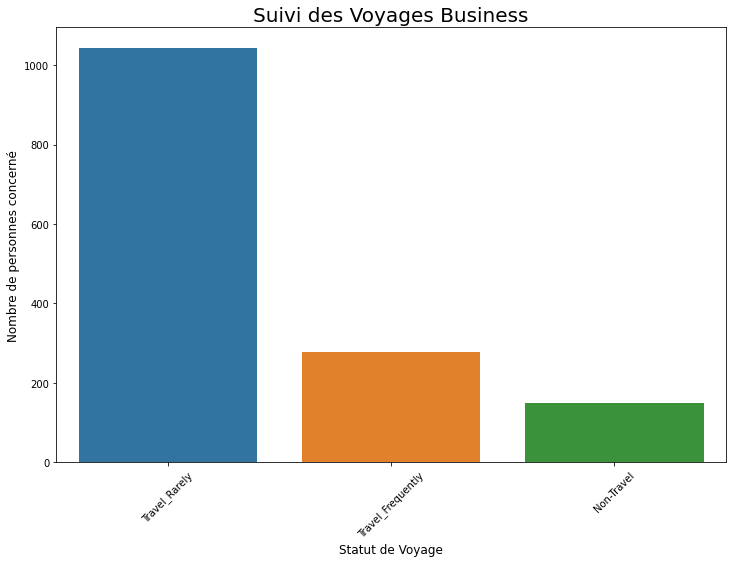

In [45]:
# Définir l'espace de travail
plt.figure(figsize=(12, 8))
# Visualiser le graphique en appellant la fonction
bar_plot(attrition_df, "BusinessTravel")
# Roter les étiquettes de l'axe x
plt.xticks(rotation=45)
# Décrire le graphique
describe_graph("Suivi des Voyages Business",
               "Statut de Voyage",
               "Nombre de personnes concerné");

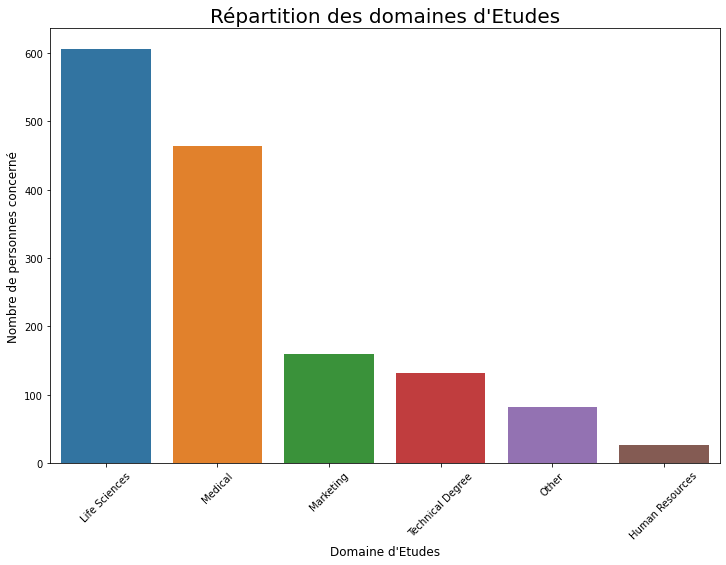

In [46]:
# Prendre l'odre des domaines
order = attrition_df["EducationField"].value_counts().index
# Définir l'espace de travail
plt.figure(figsize=(12, 8))
# Visualiser le graphique
bar_plot(attrition_df, "EducationField", order=order)
# Roter les étiquettes de l'axe x
plt.xticks(rotation=45)
# Décrire le graphique
describe_graph("Répartition des domaines d'Etudes",
               "Domaine d'Etudes",
               "Nombre de personnes concerné");

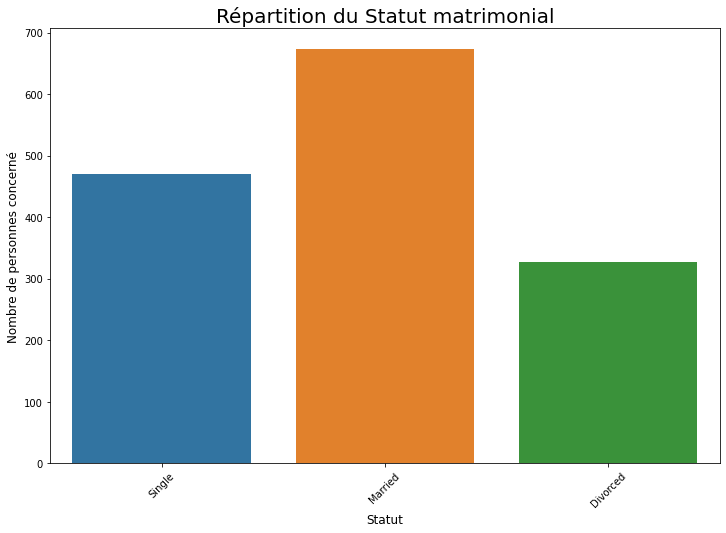

In [47]:
# Définir l'espace de travail
plt.figure(figsize=(12, 8))
#plt.figure(figsize=(10, 8))
# Visualiser le graphique
bar_plot(attrition_df, "MaritalStatus")
# Roter les étiquettes de l'axe x
plt.xticks(rotation=45)
# Décrire le graphique
describe_graph("Répartition du Statut matrimonial", 
               "Statut", 
               "Nombre de personnes concerné");

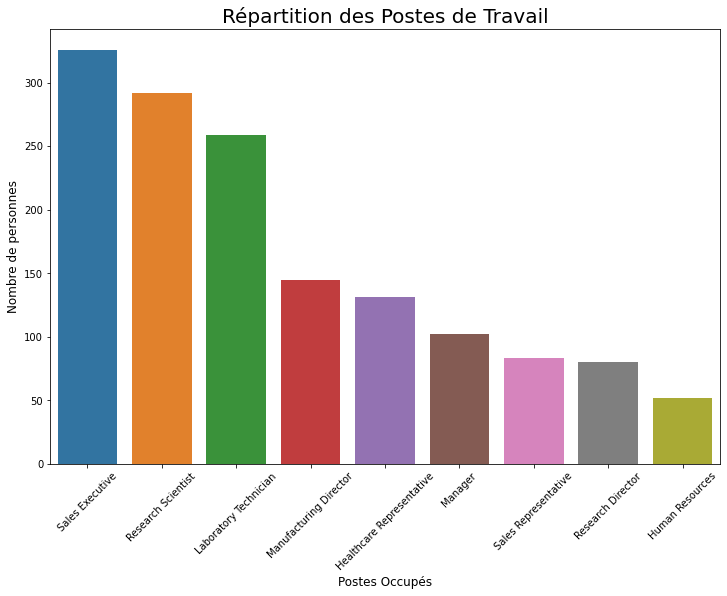

In [48]:
# Définir l'espace de travail
plt.figure(figsize=(12, 8))
# Visualiser le graphique
bar_plot(attrition_df, "JobRole")
# Roter les étiquettes de l'axe x
plt.xticks(rotation=45)
# Décrire le graphique
describe_graph("Répartition des Postes de Travail",
               "Postes Occupés",
               "Nombre de personnes");

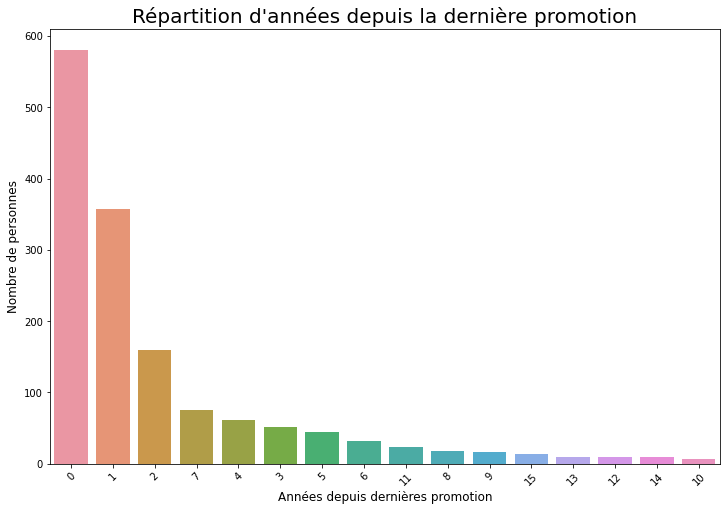

In [49]:
# Prendre l'ordre dans années
order = attrition_df.YearsSinceLastPromotion.value_counts().index
# Définir l'espace de travail
plt.figure(figsize=(12, 8))
# Visualiser le graphique
bar_plot(attrition_df, "YearsSinceLastPromotion", order=order)
# Roter les étiquettes de l'axe x
plt.xticks(rotation=45)
# Décrire le graphique
describe_graph("Répartition d'années depuis la dernière promotion", 
               "Années depuis dernières promotion", 
               "Nombre de personnes");

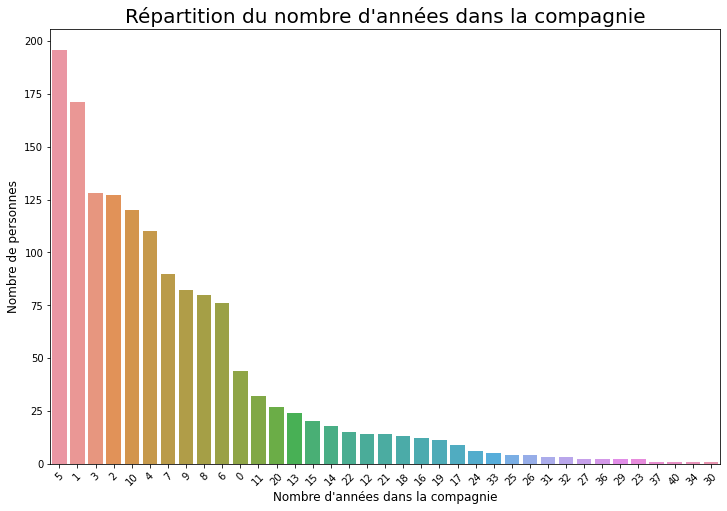

In [50]:
order = attrition_df["YearsAtCompany"].value_counts().index
# Définir l'espace de travail
plt.figure(figsize=(12, 8))
# Visualiser le graphique
bar_plot(attrition_df, "YearsAtCompany", order=order)
# Roter les étiquettes de l'axe x
plt.xticks(rotation=45)
# Décrire le graphique
describe_graph("Répartition du nombre d'années dans la compagnie",
               "Nombre d'années dans la compagnie",
               "Nombre de personnes");

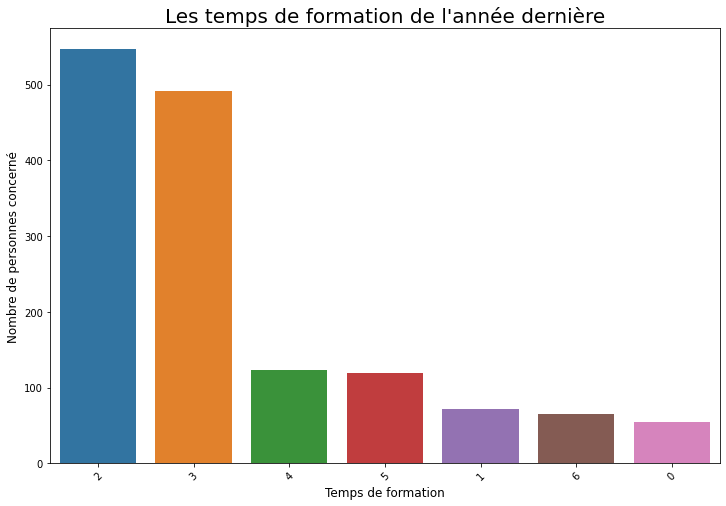

In [51]:
# Prendre l'ordre
order = attrition_df["TrainingTimesLastYear"].value_counts().index
# Définir l'espace de travail
plt.figure(figsize=(12, 8))
# Visualiser le graphique
bar_plot(attrition_df, "TrainingTimesLastYear", order=order)
# Roter les étiquettes de l'axe x
plt.xticks(rotation=45)
# Décrire le graphique
describe_graph("Les temps de formation de l'année dernière",
               "Temps de formation",
               "Nombre de personnes concerné");

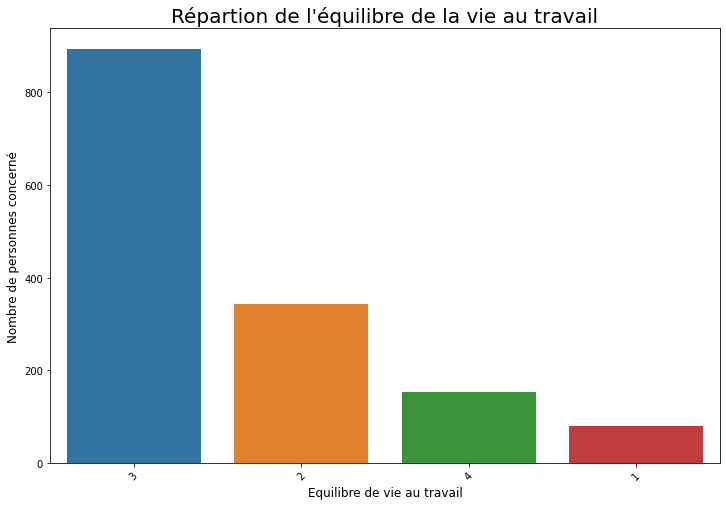

In [52]:
# Prendre l'ordre
order = attrition_df["WorkLifeBalance"].value_counts().index
# Définir l'espace de travail
plt.figure(figsize=(12, 8))
# Visualiser le graphique
bar_plot(attrition_df, "WorkLifeBalance", order=order)
# Roter les étiquettes de l'axe x
plt.xticks(rotation=45)
# Décrire le graphique
describe_graph("Répartion de l'équilibre de la vie au travail",
               "Equilibre de vie au travail",
               "Nombre de personnes concerné");

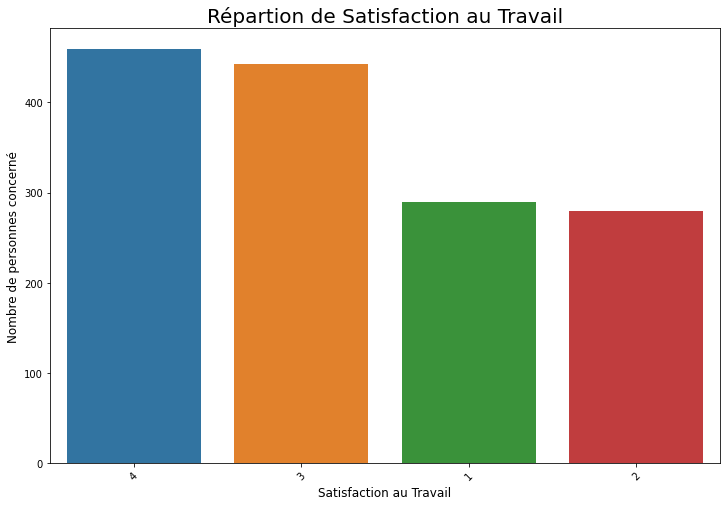

In [53]:
# Prendre l'ordre
order = attrition_df["JobSatisfaction"].value_counts().index
# Définir l'espace de travail
plt.figure(figsize=(12, 8))
# Visualiser le graphique
bar_plot(attrition_df, "JobSatisfaction", order=order)
# Roter les étiquettes de l'axe x
plt.xticks(rotation=45)
# Décrire le graphique
describe_graph("Répartion de Satisfaction au Travail",
               "Satisfaction au Travail",
               "Nombre de personnes concerné");

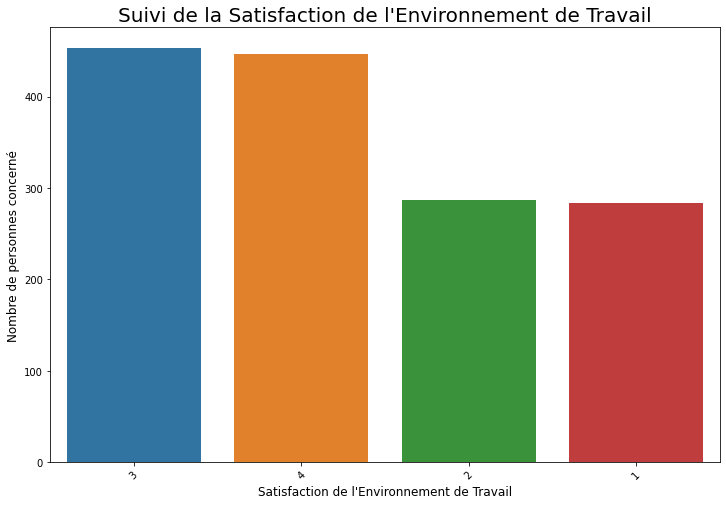

In [54]:
# Prendre l'ordre
order = attrition_df["EnvironmentSatisfaction"].value_counts().index
# Définir l'espace de travail
plt.figure(figsize=(12, 8))
# Visualiser le graphique
bar_plot(attrition_df, "EnvironmentSatisfaction", order=order)
# Roter les étiquettes de l'axe x
plt.xticks(rotation=45)
# Décrire le graphique
describe_graph("Suivi de la Satisfaction de l'Environnement de Travail",
               "Satisfaction de l'Environnement de Travail",
               "Nombre de personnes concerné");

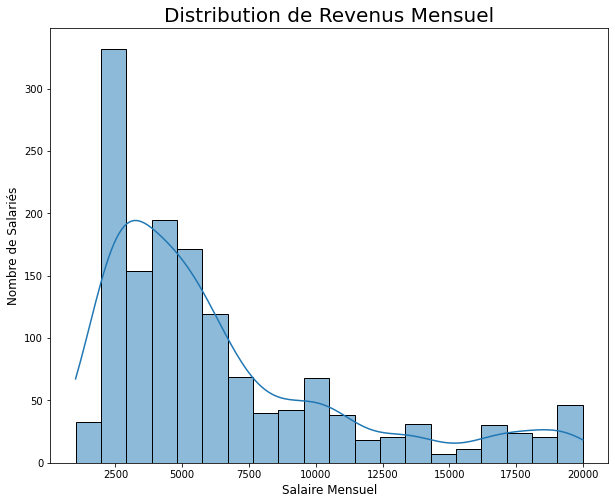

In [56]:
# Dessiner l'espace de travail
plt.figure(figsize=(10, 8))
# Faire appel à la fonction de distribution
distribution_plot(attrition_df, "MonthlyIncome")
# Décrire le graphique
describe_graph("Distribution de Revenus Mensuel", 
               "Salaire Mensuel", 
               "Nombre de Salariés");

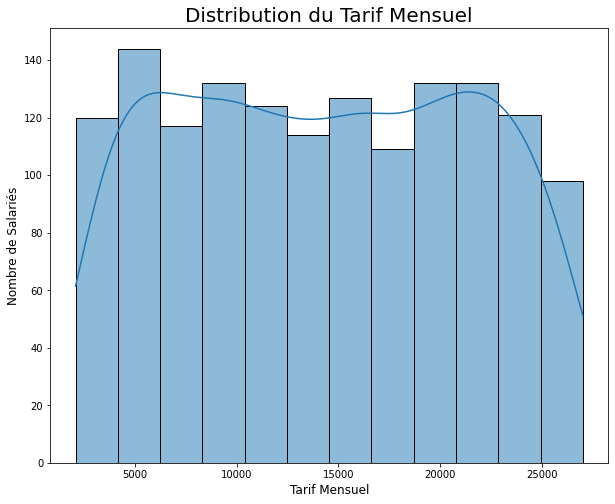

In [57]:
# Dessiner l'espace de travail
plt.figure(figsize=(10, 8))
# Faire appel à la fonction de distribution
distribution_plot(attrition_df, "MonthlyRate")
# Décrire le graphique
describe_graph("Distribution du Tarif Mensuel",
               "Tarif Mensuel",
               "Nombre de Salariés");

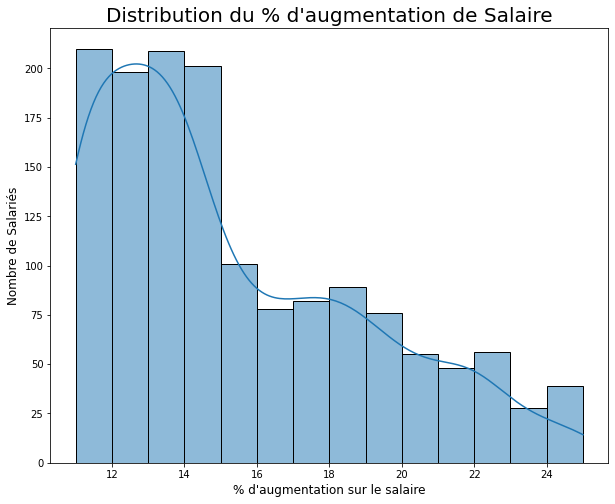

In [58]:
# Dessiner l'espace de travail
plt.figure(figsize=(10, 8))
# Faire appel à la fonction des histogrammes
distribution_plot(attrition_df, "PercentSalaryHike")
# Faire appel à la fonction de description de graphique
describe_graph("Distribution du % d'augmentation de Salaire", 
               "% d'augmentation sur le salaire", 
               "Nombre de Salariés");

# Analyse Bivariée
Cette analyse permet de montrer les relations entre les différentes variables de nos données afin d'en tirer quelques conclusions.

In [59]:
# Définir la fonction de colorage
def color_map(start, light=1, as_cmap=True):

    s = np.linspace(0, 3, 10)
    # Colorer
    sns.cubehelix_palette(start=start, 
                          light=light, 
                          as_cmap=as_cmap)
    
# Définir la fonction de génération de graphique
def kde_plot(x, y, cmap, shade=True, **kwargs):

    sns.kdeplot(x=x, y=y, cmap=cmap, shade=shade, **kwargs)

In [29]:
# Afficher de nouveau les 5 premières lignes de données
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



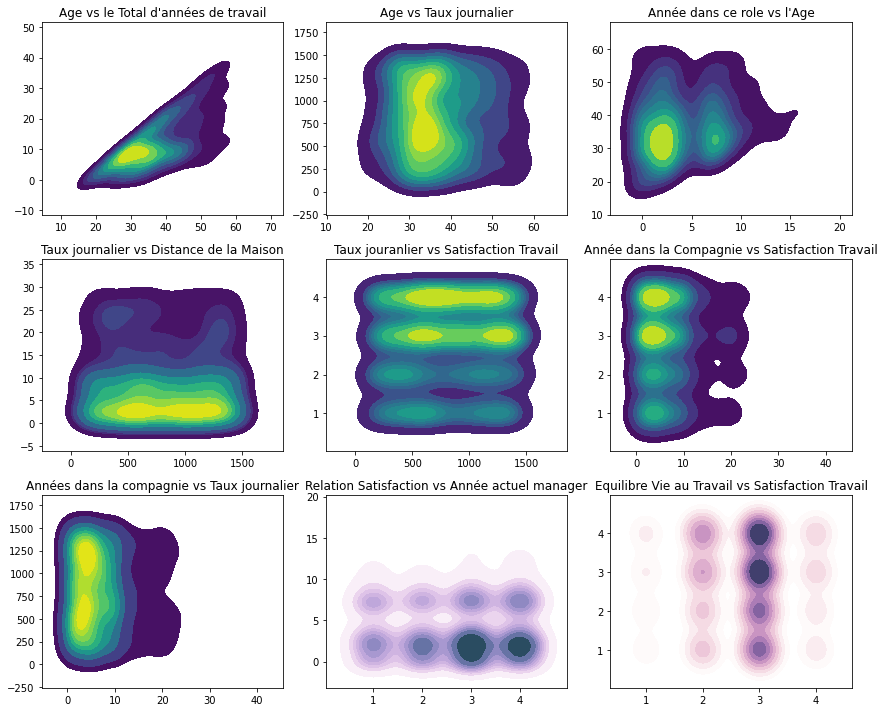

In [30]:
fig, axes =plt.subplots(3, 3, figsize=(12, 10),
                        sharex=False, sharey=False)

# Définir la colormap
cmap = color_map(start=0.0, light=1, as_cmap=True)
# Générer les axes
x = attrition_df['Age'].values
y = attrition_df['TotalWorkingYears'].values
# Visualiser le graphique de liaison entre l'age et total des années de travail
kde_plot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0, 0])
# Titrer le graphique
axes[0, 0].set(title="Age vs le Total d'années de travail")

cmap = color_map(start=0.333, light=1, as_cmap=True)
# Générer les axes
x = attrition_df['Age'].values
y = attrition_df['DailyRate'].values
# Visualiser la relation entre l'age et le taux journalier
kde_plot(x, y, cmap=cmap, shade=True, ax=axes[0, 1])
# Titrer le graphique
axes[0, 1].set(title="Age vs Taux journalier")


cmap = color_map(start=0.667, light=1, as_cmap=True)
# Générer les axes
x = attrition_df['YearsInCurrentRole'].values
y = attrition_df['Age'].values
# Visualiser le graphique
kde_plot(x, y, cmap=cmap, shade=True, ax=axes[0, 2])
# Titrer le graphique
axes[0, 2].set(title="Année dans ce role vs l'Age")

cmap = color_map(start=1.0, light=1, as_cmap=True)
# Générer les valeurs des axes
x = attrition_df['DailyRate'].values
y = attrition_df['DistanceFromHome'].values
# Visualiser le graphique
kde_plot(x, y, cmap=cmap, shade=True,  ax=axes[1, 0])
# Titrer le graphique
axes[1, 0].set(title="Taux journalier vs Distance de la Maison")

cmap = color_map(start=1.333, light=1, as_cmap=True)
# Générer les valeurs des axes
x = attrition_df['DailyRate'].values
y = attrition_df['JobSatisfaction'].values
# Visualiser le graphique
kde_plot(x, y, cmap=cmap, shade=True,  ax=axes[1, 1])
# Titrer le graphique
axes[1, 1].set(title="Taux jouranlier vs Satisfaction Travail")

cmap = color_map(start=1.667, light=1, as_cmap=True)
# Générer les valeurs des axes
x = attrition_df['YearsAtCompany'].values
y = attrition_df['JobSatisfaction'].values
# Visualiser le graphique
kde_plot(x, y, cmap=cmap, shade=True,  ax=axes[1, 2])
# Titrer le graphique
axes[1, 2].set(title="Année dans la Compagnie vs Satisfaction Travail")

cmap = color_map(start=2.0, light=1, as_cmap=True)
# Générer les valeurs des axes
x = attrition_df['YearsAtCompany'].values
y = attrition_df['DailyRate'].values
# Visualiser le graphique
kde_plot(x, y, cmap=cmap, shade=True,  ax=axes[2, 0])
# Titrer le graphiqu
axes[2, 0].set(title="Années dans la compagnie vs Taux journalier")

cmap = sns.cubehelix_palette(start=2.333, light=1, as_cmap=True)
# Générer les valeurs des axes
x = attrition_df['RelationshipSatisfaction'].values
y = attrition_df['YearsWithCurrManager'].values
# Visualiser le graphique
kde_plot(x, y, cmap=cmap, shade=True,  ax=axes[2, 1])
axes[2, 1].set(title="Relation Satisfaction vs Année actuel manager")

cmap = sns.cubehelix_palette(start=2.667, light=1, as_cmap=True)
# Generate and plot
x = attrition_df['WorkLifeBalance'].values
y = attrition_df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2, 2])
axes[2, 2].set(title="Equilibre Vie au Travail vs Satisfaction Travail")

# Afficher tous les graphiques
fig.tight_layout()

In [63]:
# Définir une liste des colonnes à utiliser
cols = ["Age", "BusinessTravel", "Department", "DistanceFromHome", "MonthlyIncome",
        "EducationField", "EnvironmentSatisfaction", "JobRole", "JobSatisfaction",
        "MaritalStatus", "NumCompaniesWorked", "TrainingTimesLastYear", "PercentSalaryHike",
        "WorkLifeBalance", "YearsSinceLastPromotion", "YearsInCurrentRole"]

- **Relation entre quelques features et la target**

In [64]:
# Appeler la fonction de visualisation

# Parcourir la liste des variables
for col in cols:

    box_plot(attrition_df, 
             x_column="Attrition", 
             y_column=col,
             color="Attrition",
             cmap={"Yes":"red", "No":"green"})

# Analyse Multivariée
Dans cette section, il s'agit de trouver les relations existentes entre plusieurs variables afin de comprendre les critères qui poussent les employés à demissionner de leurs emplois.

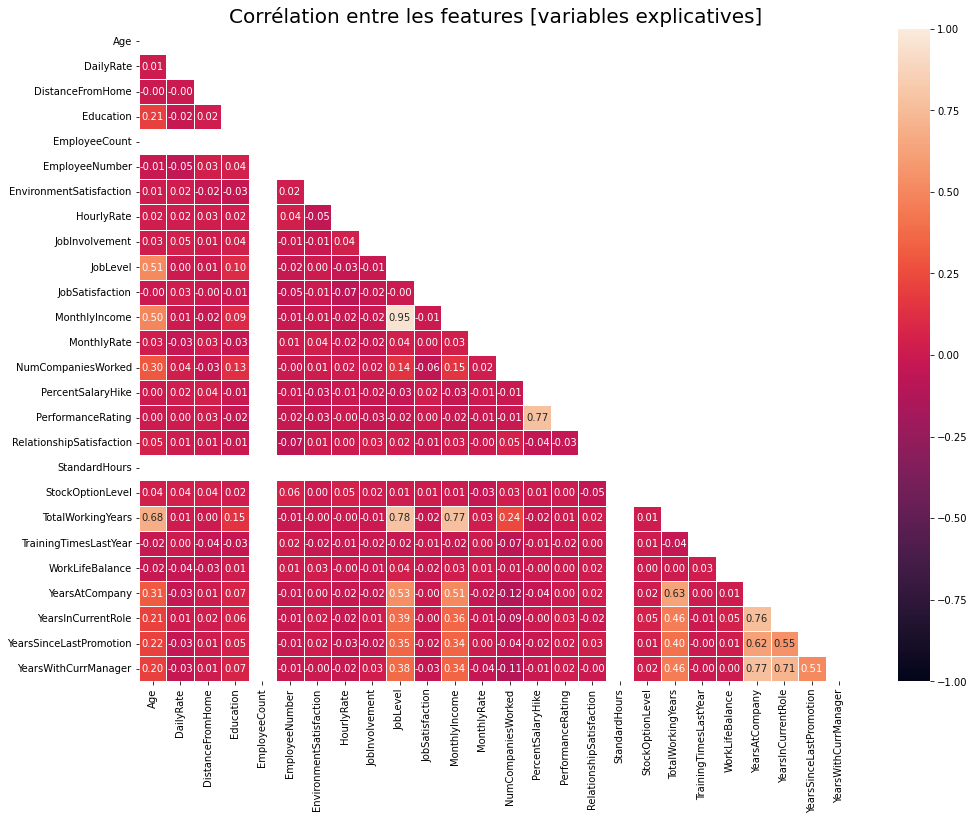

In [74]:
# Calculer la matrice de corrélation
pearson_matrix = attrition_df.corr()
# Filtrer la matrice triangulaire inférieur
mask = np.triu(np.ones_like(pearson_matrix))

# Visualiser la matrice de correlation
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(pearson_matrix, mask=mask, 
            annot=True, ax=ax,
            fmt=".2f", linewidths=.5, 
            vmin=-1, vmax=1)
# Titrer le graphique
plt.title("Corrélation entre les features [variables explicatives]", 
          fontsize=20);

In [106]:
# Définir un dictionnaire pour mapper la target
target_map = {'Yes': 1, 'No': 0}
# Utiliser la méthode apply de Pandas pour encoder la target
attrition_df["Attrition_numerical"] = attrition_df["Attrition"].apply(
    lambda x: target_map[x])

# Créer une liste uniquement de colonnes numériques
num_cols = attrition_df.select_dtypes(include=np.number).columns.tolist()
data = [
    go.Heatmap(
        # Générer la corrélation de Pearson
        z=attrition_df[num_cols].astype(float).corr().values,
        x=attrition_df[num_cols].columns.values,
        y=attrition_df[num_cols].columns.values,
        colorscale='Viridis',
        reversescale=False,
        #text = True ,
        opacity=1.0

    )
]


layout = go.Layout(
    title="Corrélation de Pearson des variables numériques",
    xaxis=dict(ticks='', nticks=36),
    yaxis=dict(ticks=''),
    width=900, height=700,

)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap');

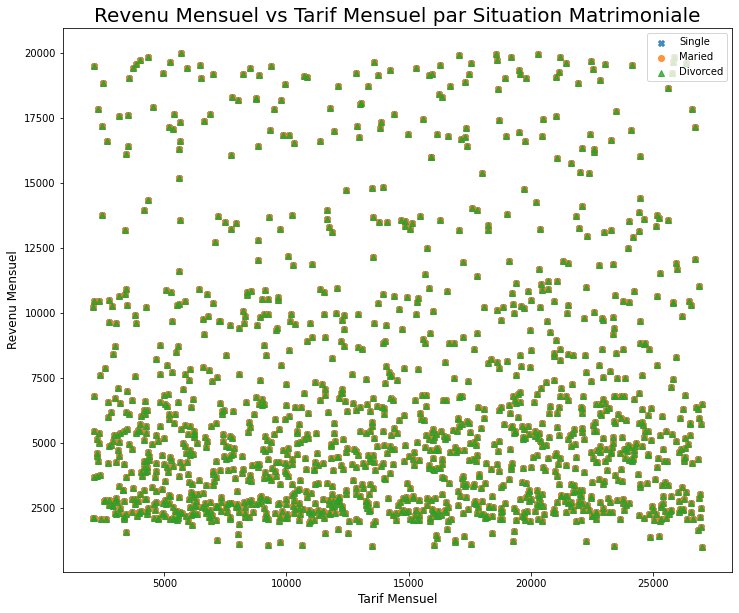

In [83]:
# Dessiner l'espace de travail
plt.figure(figsize=(12, 10))

# Choisir les symboles des status matrimoniaux
mstatus_marker = [["Single", "X"], ["Maried", "o"], ["Divorced", "^"]]

for mstatus, marker in mstatus_marker:
    plot_data = attrition_df

    # Visualiser le graphique
    sns.regplot(x="MonthlyRate", y="MonthlyIncome",
                data=plot_data, fit_reg=False,
                marker=marker, x_jitter=0.04)

# Décrire le graphique
describe_graph("Revenu Mensuel vs Tarif Mensuel par Situation Matrimoniale",
               "Tarif Mensuel", 
               "Revenu Mensuel")
# Appliquer la légende
plt.legend(["Single", "Maried", "Divorced"]);

In [86]:
attrition_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


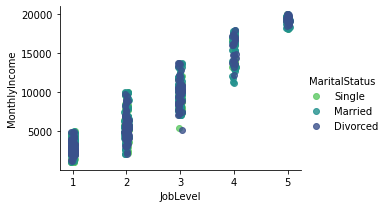

In [90]:
g = sns.FacetGrid(data=attrition_df, hue="MaritalStatus",
                  aspect=1.5, palette="viridis_r")
g = g.map(sns.regplot, "JobLevel",
          "MonthlyIncome", x_jitter=0.04, fit_reg=False)
g.add_legend();

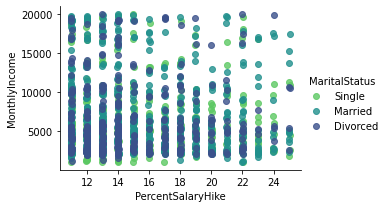

In [85]:
g = sns.FacetGrid(data=attrition_df, hue="MaritalStatus", 
                  aspect=1.5, palette="viridis_r")
g = g.map(sns.regplot, "PercentSalaryHike", 
          "MonthlyIncome", x_jitter=0.04, fit_reg=False)
g.add_legend();

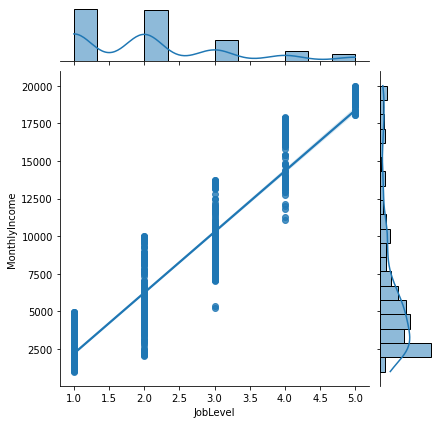

In [101]:
# Visualiser la relation entre le 
# Niveau de Travail et le Revenu Mensuel
sns.jointplot(data=attrition_df, 
              x="JobLevel", 
              y="MonthlyIncome",
              kind="reg");

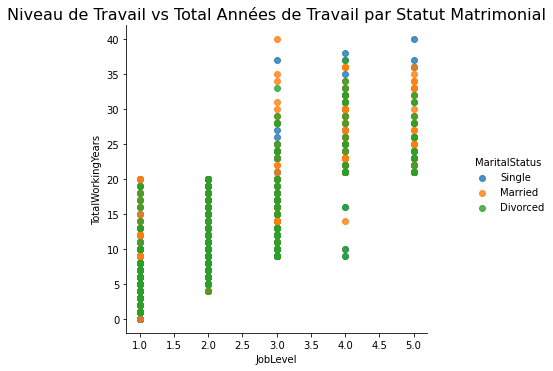

In [104]:
sns.lmplot(data=attrition_df,
              x="JobLevel",
              y="TotalWorkingYears",
              hue="MaritalStatus",
              fit_reg=False)
plt.title("Niveau de Travail vs Total Années de Travail par Statut Matrimonial",
          fontsize=16);